## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged=pd.merge(mouse_metadata,study_results, on='Mouse ID')
merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, ariance, standard deviation, and SEM of the tumor volume for each regimen
grouped=merged.groupby('Drug Regimen')
mean=grouped['Tumor Volume (mm3)'].mean()
median=grouped['Tumor Volume (mm3)'].median()
variance=grouped['Tumor Volume (mm3)'].var()
stDev=grouped['Tumor Volume (mm3)'].std()
sem=grouped['Tumor Volume (mm3)'].sem()
dic={'Mean': mean, 'median': median, 'variance': variance, 'Standar devition': stDev, 'SEM': sem}
summary=pd.DataFrame(dic)
summary


,Mean,median,variance,Standar devition,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0, 0.5, 'Number of data points')

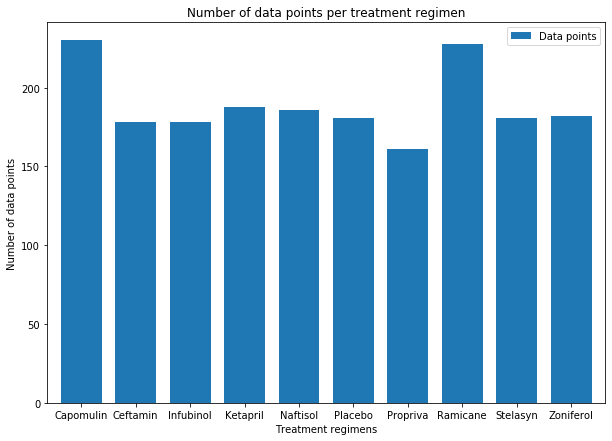

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
number_points=grouped['Drug Regimen'].count()
regimens=summary.index
dic={'Regimens': regimens, "Data points": number_points}
graph=pd.DataFrame(dic)
ax=graph.plot(kind='bar', figsize=(10,7), rot=0,width=0.75,title='Number of data points per treatment regimen', legend=True)
ax.set_xlabel("Treatment regimens")
ax.set_ylabel("Number of data points")


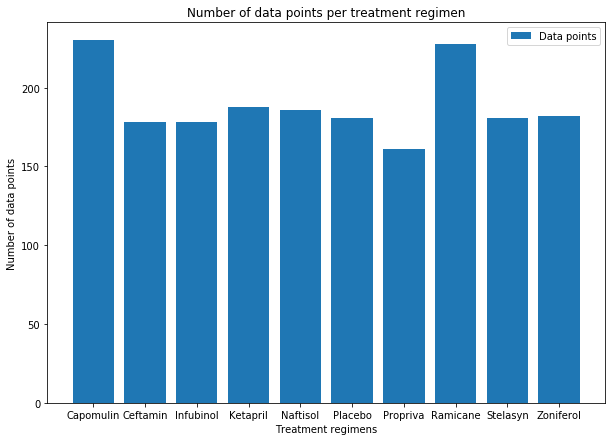

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
number_points=grouped['Drug Regimen'].count()
regimens=summary.index
plt.figure(figsize=(10,7))
plt.bar(regimens, number_points)
plt.title('Number of data points per treatment regimen')
plt.xlabel("Treatment regimens")
plt.ylabel("Number of data points")
plt.legend(['Data points'])

## Pie plots

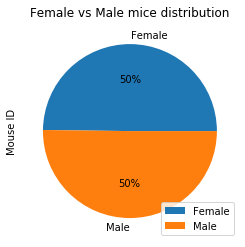

In [94]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grouped=merged.groupby('Sex')
count=grouped['Mouse ID'].nunique()
ax=count.plot(kind='pie', legend=True, title='Female vs Male mice distribution', autopct='%2.0f%%')
ax.legend(loc='lower right')

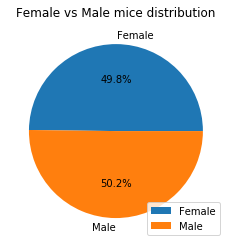

In [97]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(count,labels=count.index, autopct='%1.1f%%')
plt.title('Female vs Male mice distribution')
plt.legend(count.index, loc='lower right')

## Quartiles, outliers and boxplots

In [98]:
max_tumor = merged.groupby(["Mouse ID"]).max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = max_tumor[['Mouse ID','Timepoint']].merge(merged,on=['Mouse ID','Timepoint'],how="left")
capomulin = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)'] 
ramicane = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)'] 
infubinol = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)'] 
ceftamin = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)'] 


In [99]:
#change column orders
max_tumor=max_tumor[['Mouse ID','Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites','Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]

In [100]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. grouped=merged.groupby(['Drug Regimen','Mouse ID'])
#First Capomulin regimen
cap_quartiles = capomulin.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"The lower quartile of avg tumor volume is: {round(cap_lowerq,2)}")
print(f"The upper quartile of avg tumor volume is: {round(cap_upperq,2)}")
print(f"The interquartile range of avg tumor volume is: {round(cap_iqr,2)}")
print(f"The the median of avg tumor volume is: {round(cap_quartiles[0.5],2)} ")

lower_bound = cap_lowerq - (1.5*cap_iqr)
upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Values below {round(cap_lower_bound,2)} could be outliers.")
print(f"Values above {round(cap_upper_bound,2)} could be outliers.")

The lower quartile of avg tumor volume is: 32.38
The upper quartile of avg tumor volume is: 40.16
The interquartile range of avg tumor volume is: 7.78
The the median of avg tumor volume is: 38.13 
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.


In [101]:
# Calculate the IQR and quantitatively determine if there are any potential outliers
#Second ramicane regimen
ram_quartiles = ramicane.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"The lower quartile of avg tumor volume is: {round(ram_lowerq,2)}")
print(f"The upper quartile of avg tumor volume is: {round(ram_upperq,2)}")
print(f"The interquartile range of avg tumor volume is: {round(ram_iqr,2)}")
print(f"The the median of avg tumor volume is: {round(ram_quartiles[0.5],2)} ")

lower_bound = ram_lowerq - (1.5*ram_iqr)
upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Values below {round(ram_lower_bound,2)} could be outliers.")
print(f"Values above {round(ram_upper_bound,2)} could be outliers.")


The lower quartile of avg tumor volume is: 31.56
The upper quartile of avg tumor volume is: 40.66
The interquartile range of avg tumor volume is: 9.1
The the median of avg tumor volume is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.


In [102]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#third infubinol regimen
inf_quartiles = infubinol.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"The lower quartile of avg tumor volume is: {round(inf_lowerq,2)}")
print(f"The upper quartile of avg tumor volume is: {round(inf_upperq,2)}")
print(f"The interquartile range of avg tumor volume is: {round(inf_iqr,2)}")
print(f"The the median of avg tumor volume is: {round(inf_quartiles[0.5],2)} ")

lower_bound = inf_lowerq - (1.5*inf_iqr)
upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Values below {round(inf_lower_bound,2)} could be outliers.")
print(f"Values above {round(inf_upper_bound,2)} could be outliers.")

The lower quartile of avg tumor volume is: 54.05
The upper quartile of avg tumor volume is: 65.53
The interquartile range of avg tumor volume is: 11.48
The the median of avg tumor volume is: 60.17 
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.


In [103]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
#fourth ceftamin regimen
cef_quartiles = ceftamin.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"The lower quartile of avg tumor volume is: {round(cef_lowerq,2)}")
print(f"The upper quartile of avg tumor volume is: {round(cef_upperq,2)}")
print(f"The interquartile range of avg tumor volume is: {round(cef_iqr,2)}")
print(f"The the median of avg tumor volume is: {round(cef_quartiles[0.5],2)} ")

lower_bound = cef_lowerq - (1.5*cef_iqr)
upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"Values below {round(cef_lower_bound,2)} could be outliers.")
print(f"Values above {round(cef_upper_bound,2)} could be outliers.")

The lower quartile of avg tumor volume is: 48.72
The upper quartile of avg tumor volume is: 64.3
The interquartile range of avg tumor volume is: 15.58
The the median of avg tumor volume is: 59.85 
Values below 25.36 could be outliers.
Values above 87.67 could be outliers.


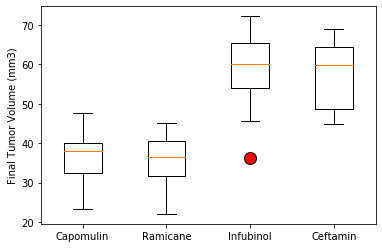

In [104]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outlier= dict(markerfacecolor='red',markersize=12)
plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=outlier)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

In [105]:
#Getting the possible Infubonil outlier
inf_outlier=0
for x in infubinol.iteritems():
    if x[1]<inf_lower_bound:
      inf_outlier=(x[1])  
print(f"The value {round(inf_outlier,2)} could be an outlier.")

The value 36.32 could be an outlier.


## Line and scatter plots

In [80]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#First we just take the rows where the treatment is Capomulin by using .loc
capomulin_frame=merged.loc[merged['Drug Regimen']== 'Capomulin']
#We create a Series containing all the unique mouse ids for Capomulin treatments
mouse_ids=capomulin_frame['Mouse ID'].unique()
print(mouse_ids)


['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157']


Select one of the mouses ID from above l509


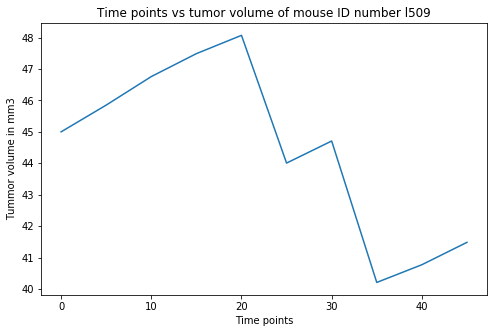

In [81]:
#We ask the user to select one of the mouses treated with Capomulin
selection=input('Select one of the mouses ID from above ')
#And we just get the timepoints and tumor volume info of the mouse id selected by the user
time_points=capomulin_frame.loc[capomulin_frame['Mouse ID']== selection, ['Timepoint']]
tumor_volume=capomulin_frame.loc[capomulin_frame['Mouse ID']== selection, ['Tumor Volume (mm3)']]
plt.figure(figsize=(8,5))
plt.plot(time_points,tumor_volume)
plt.title(f'Time points vs tumor volume of mouse ID number {selection}')
plt.xlabel('Time points')
plt.ylabel('Tummor volume in mm3')
plt.show()


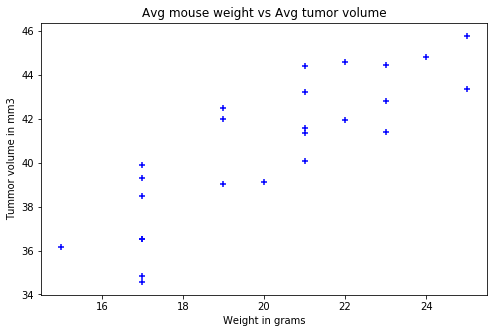

In [82]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_frame=merged.loc[merged['Drug Regimen']== 'Capomulin']
capomulin_grouped=capomulin_frame.groupby('Mouse ID').mean()
weight=capomulin_grouped['Weight (g)']
volume=capomulin_grouped['Tumor Volume (mm3)']
plt.figure(figsize=(8,5))
plt.scatter(weight,volume,marker="+", facecolors="blue")
plt.title('Avg mouse weight vs Avg tumor volume')
plt.xlabel('Weight in grams')
plt.ylabel('Tummor volume in mm3')
plt.show()

In [83]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight,volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


The ecuation is y=0.95x + 21.55


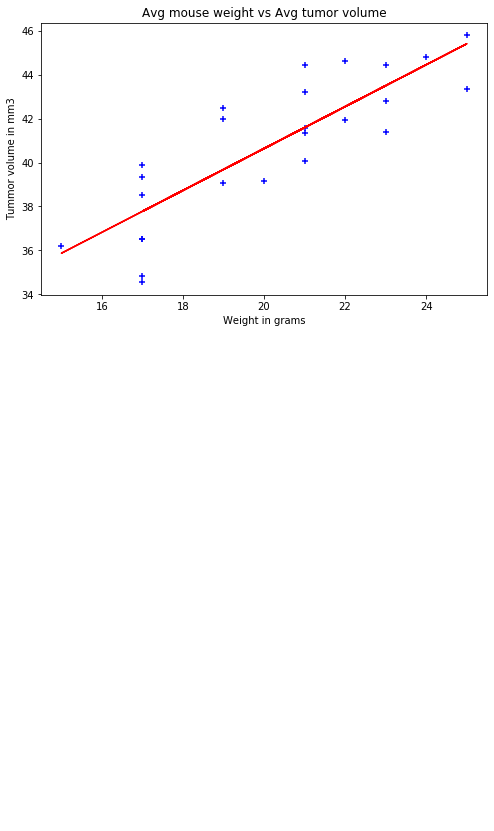

In [84]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight,volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(8,5))
plt.scatter(weight,volume,marker="+", color='blue')
plt.title('Avg mouse weight vs Avg tumor volume')
plt.xlabel('Weight in grams')
plt.ylabel('Tummor volume in mm3')
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=15,color="red")
print(f'The ecuation is y={str(round(slope,2))}x + {str(round(intercept,2))}')